<a href="https://colab.research.google.com/github/yahiroyudai/DeepLearning2022Late/blob/main/DogVSCat2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Kerasを使用したディープラーニングをやつてみる
###画像認識を行う

##ライブラリの読み取り

In [22]:
%matplotlib inline
from keras.applications.vgg16 import VGG16,preprocess_input,decode_predictions
from keras.preprocessing import image
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import sys

##学習済みモデルの読み込み

In [23]:
model = VGG16( weights = 'imagenet' )

##画像判定のための関数

In [24]:
def predict( filename, featuresize ):
  img = image.load_img( filename, target_size=( 224,224 ) )
  x = image.img_to_array( img )
  x = np.expand_dims( x, axis=0 )
# 判定を実行
  preds = model.predict( preprocess_input( x ) )
  results = decode_predictions( preds, top=featuresize )[0]
  return results 
#関数終わり

##画像表示のための関数

In [25]:
def showimg( filename, title, i ):
  im = Image.open( filename )
  im_list = np.array( im )
  plt.subplot( 2, 5, i )
  plt.title( title )
  plt.axis( "off" )
  plt.imshow( im_list )

##Kaggeにある画像データを利用
https://www.kaggl.com/
### 犬猫判定用の画像データ
https://www.kaggle.com/c/dogs-vs-cats/data

##指定されたURLからファイルをダウンロードする

In [26]:
#wgetでwebからファイルをダウンロードする
#GooglColabでコマンドを実行するときは、先頭に！マークを必ずつけること
#小さいファイルをGoogleドライブからDLする時は、以下のようにURLをつけるだけでOK
!wget --load-cookies /tmp/cookies.txt "https://drive.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://drive.google.com/uc?export=download&id=1WQ9KZ-St4BqUWkqYJZYBIXQ8tT92DW_2' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1WQ9KZ-St4BqUWkqYJZYBIXQ8tT92DW_2" -O train.zip && rm -rf /tmp/cookies.txt
!wget --load-cookies /tmp/cookies.txt "https://drive.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://drive.google.com/uc?export=download&id=1WQ9KZ-St4BqUWkqYJZYBIXQ8tT92DW_2' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1WQ9KZ-St4BqUWkqYJZYBIXQ8tT92DW_2" -O test.zip && rm -rf /tmp/cookies.txt

--2022-10-04 01:04:32--  https://drive.google.com/uc?export=download&confirm=t&id=1WQ9KZ-St4BqUWkqYJZYBIXQ8tT92DW_2
Resolving drive.google.com (drive.google.com)... 142.251.31.139, 142.251.31.101, 142.251.31.102, ...
Connecting to drive.google.com (drive.google.com)|142.251.31.139|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0k-1s-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/8nasnq6jj4ef3nlv5d4cvrvovbrtq942/1664845425000/14334177730080324288/*/1WQ9KZ-St4BqUWkqYJZYBIXQ8tT92DW_2?e=download&uuid=96a4dabd-175e-4e33-a9a8-651225c0a752 [following]
--2022-10-04 01:04:33--  https://doc-0k-1s-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/8nasnq6jj4ef3nlv5d4cvrvovbrtq942/1664845425000/14334177730080324288/*/1WQ9KZ-St4BqUWkqYJZYBIXQ8tT92DW_2?e=download&uuid=96a4dabd-175e-4e33-a9a8-651225c0a752
Resolving doc-0k-1s-docs.googleusercontent.com (doc-0k-1s-docs.googleusercontent.com)... 108.177.127

##ColabにGoogleアカウントのドライブをマウントする

In [27]:
#Googleドライブを操作するモジュールをimport
from google.colab import drive
#Googleドライブをマウント
drive.mount ('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##DLしてきたファイルをマウントしたディレクトリにコピーする

In [28]:
#コピーファイルを置くディレクトリを作る
import os
dir_path = "/content/drive/My Drive/2022LATE"
#すでにディレクトリがあってもエラーにしない
os.makedirs(dir_path, exist_ok=True)
!pwd #今いるディレクトリを表示
#ファイルをコピー
!cp train.zip "/content/drive/My Drive/2022LATE"
#tedt.zipはいったん使わないのでコピーしない

/content


##GoogleドライブからColabへファイルをコピー

In [29]:
!cp "/content/drive/My Drive/2022LATE/train.zip"

cp: missing destination file operand after '/content/drive/My Drive/2022LATE/train.zip'
Try 'cp --help' for more information.


##zipファイルを解凍する

In [30]:
#unzipコマンドで解凍
!unzip -o -q "train.zip"
print("zip解凍完了")

zip解凍完了


##解凍した画像を使って画像判定をさせる

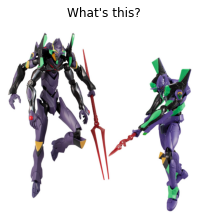

('n04228054', 'ski', 0.7511653)
('n03888257', 'parachute', 0.07858699)
('n03733131', 'maypole', 0.05863159)
('n02879718', 'bow', 0.025597833)
('n04336792', 'stretcher', 0.007605628)
('n03532672', 'hook', 0.007368704)
('n04371774', 'swing', 0.0063195815)
('n01818515', 'macaw', 0.0046297037)
('n03944341', 'pinwheel', 0.004192307)
('n09193705', 'alp', 0.004148803)


In [31]:
#画像を指定する変数
filename = "EVA.jpg"
plt.figure(figsize=(20, 10))
for i in range(1):
  showimg(filename, "What's this?", i+1)
#ループ終わり
plt.show()
#表示した画像を判定
results = predict(filename, 10)
for result in results:
  print(result)